In [1]:
# Train dataset code

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Import the dataset

In [4]:
data=pd.read_csv('train_BRCpofr.csv')
data

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [5]:
# Checking the null places in the dataset

In [6]:
data.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
89387    0
89388    0
89389    0
89390    0
89391    0
Length: 89392, dtype: int64

In [7]:
# Check the data types of the component

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [ ]:
# Creat dummy variables

In [9]:
inp=pd.get_dummies(data,prefix_sep='_',columns=['gender','area','qualification','income','marital_status','num_policies','policy','type_of_policy'])
inp

,id,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,...,marital_status_0,marital_status_1,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,5,5790,64308,0,1,0,1,1,0,...,0,1,0,1,1,0,0,0,1,0
1,2,8,5080,515400,0,1,1,0,0,1,...,1,0,0,1,1,0,0,0,1,0
2,3,8,2599,64212,0,1,0,1,1,0,...,0,1,0,1,1,0,0,0,1,0
3,4,7,0,97920,1,0,1,0,0,1,...,1,0,0,1,1,0,0,0,1,0
4,5,6,3508,59736,0,1,0,1,0,1,...,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,6,0,95736,0,1,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0
89388,89389,0,3897,67596,0,1,0,1,1,0,...,0,1,0,1,1,0,0,0,1,0
89389,89390,4,3363,114120,1,0,0,1,1,0,...,1,0,0,1,0,1,0,0,1,0
89390,89391,8,0,71772,1,0,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0


In [10]:
# Identify the outlier in the claim amount column

In [11]:
import matplotlib.pyplot as plt

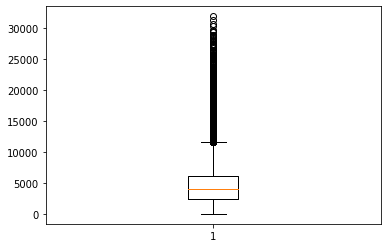

In [12]:
plt.boxplot(inp.claim_amount)
plt.show()

In [13]:
Q1=np.percentile(inp.claim_amount,[25,75])[0]
Q3=np.percentile(inp.claim_amount,[25,75])[1]
iqr=Q3-Q1
UpperLimit = Q3+1.5*iqr
LowerLimit = Q1-1.5*iqr
print('Quartile 1 is: ',+Q1)
print('Quartile 3 is: ',+Q3)
print('Inter Quartile Range is: ',+iqr)
print('Upper Limit is: ',+UpperLimit)
print('Lower Limit is: ',+LowerLimit)

Quartile 1 is:  2406.0
Quartile 3 is:  6094.0
Inter Quartile Range is:  3688.0
Upper Limit is:  11626.0
Lower Limit is:  -3126.0


In [14]:
x=inp.drop(['id','cltv'],axis=1)

In [15]:
y=pd.DataFrame(inp.cltv)

In [16]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
inp_data=LinearRegression().fit(x,y)

In [19]:
inp_data.intercept_

array([72663.2736867])

In [20]:
inp_data.coef_

array([[ 2.24325561e+02,  2.69430442e+00, -1.16781683e+03,
         1.16781683e+03, -3.15037963e+03,  3.15037963e+03,
         2.99622323e+03,  2.07031232e+03, -5.06653555e+03,
         4.11256580e+03, -9.13604096e+02, -2.63458721e+02,
        -2.93550298e+03,  3.59556291e+03, -3.59556291e+03,
        -3.24707932e+04,  3.24707932e+04, -6.62700337e+02,
        -8.33253863e+03,  8.99523897e+03,  1.02495420e+03,
         3.66077800e+02, -1.39103200e+03]])

In [21]:
predicted_cltv=pd.DataFrame(inp_data.predict(x),columns=['predicted_cltv'])
predicted_cltv

,predicted_cltv
0,124364.347405
1,123088.823600
2,116439.798691
3,106841.797945
4,116151.336897
...,...
89387,99261.368855
89388,118142.401338
89389,114786.598886
89390,104422.455104


In [22]:
predicted_data=pd.concat([x,y,predicted_cltv],axis=1)
predicted_data

,vintage,claim_amount,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,...,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,cltv,predicted_cltv
0,5,5790,0,1,0,1,1,0,0,0,...,0,1,1,0,0,0,1,0,64308,124364.347405
1,8,5080,0,1,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,515400,123088.823600
2,8,2599,0,1,0,1,1,0,0,0,...,0,1,1,0,0,0,1,0,64212,116439.798691
3,7,0,1,0,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,97920,106841.797945
4,6,3508,0,1,0,1,0,1,0,0,...,0,1,1,0,0,1,0,0,59736,116151.336897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,6,0,0,1,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,95736,99261.368855
89388,0,3897,0,1,0,1,1,0,0,0,...,0,1,1,0,0,0,1,0,67596,118142.401338
89389,4,3363,1,0,0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,114120,114786.598886
89390,8,0,1,0,1,0,0,1,0,1,...,0,1,0,1,0,0,1,0,71772,104422.455104


In [23]:
predicted_data['error_per']=abs(predicted_data.cltv-predicted_data.predicted_cltv)/(predicted_data.cltv)
predicted_data

,vintage,claim_amount,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,...,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,cltv,predicted_cltv,error_per
0,5,5790,0,1,0,1,1,0,0,0,...,1,1,0,0,0,1,0,64308,124364.347405,0.933886
1,8,5080,0,1,1,0,0,1,0,0,...,1,1,0,0,0,1,0,515400,123088.823600,0.761178
2,8,2599,0,1,0,1,1,0,0,0,...,1,1,0,0,0,1,0,64212,116439.798691,0.813365
3,7,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,1,0,97920,106841.797945,0.091113
4,6,3508,0,1,0,1,0,1,0,0,...,1,1,0,0,1,0,0,59736,116151.336897,0.944411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,6,0,0,1,1,0,0,1,0,0,...,1,0,1,0,0,1,0,95736,99261.368855,0.036824
89388,0,3897,0,1,0,1,1,0,0,0,...,1,1,0,0,0,1,0,67596,118142.401338,0.747772
89389,4,3363,1,0,0,1,1,0,0,0,...,1,0,1,0,0,1,0,114120,114786.598886,0.005841
89390,8,0,1,0,1,0,0,1,0,1,...,1,0,1,0,0,1,0,71772,104422.455104,0.454919


In [24]:
# Percenatge error calculation

In [25]:
predicted_data.error_per.mean()

0.5673026489232323

In [26]:
# accuracy rate

In [27]:
1-predicted_data.error_per.mean()

0.43269735107676766

In [ ]:
# Accuracy of this model is 43%

In [28]:
# r2 calculation for train dataset

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(predicted_data.cltv,predicted_data.predicted_cltv)

0.1522089431170709

In [ ]:
# r2 score is 0.1522

In [ ]:
## Calculation for the test dataset

In [31]:
test_data=pd.read_csv('test_koRSKBP.csv')

In [32]:
test_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [33]:
test_data.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
59590    0
59591    0
59592    0
59593    0
59594    0
Length: 59595, dtype: int64

In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [38]:
inp1=pd.get_dummies(test_data,prefix_sep='_',columns=['gender','area','qualification','income','marital_status','num_policies','policy','type_of_policy'])
inp1

,id,vintage,claim_amount,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,...,marital_status_0,marital_status_1,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,89393,6,2134,1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,89394,4,4102,1,0,0,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
2,89395,7,2925,0,1,1,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
3,89396,2,0,1,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
4,89397,5,14059,1,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,6,0,0,1,1,0,1,0,0,...,0,1,1,0,1,0,0,0,0,1
59591,148984,6,0,0,1,0,1,0,1,0,...,1,0,1,0,0,0,1,1,0,0
59592,148985,4,3323,1,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
59593,148986,1,2886,0,1,1,0,1,0,0,...,1,0,0,1,1,0,0,0,0,1


In [58]:
x1=inp1.drop(['id'],axis=1)

In [44]:
predicted_cltv1=pd.DataFrame(inp_data.predict(x1),columns=['predicted_cltv_train'])
predicted_cltv1

/usr/local/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- income_100000
- income_1200000
- income_350000
- income_750000
Feature names seen at fit time, yet now missing:
- income_2L-5L
- income_5L-10L
- income_<=2L
- income_More than 10L

  warnings.warn(message, FutureWarning)


,predicted_cltv_train
0,103590.315286
1,123521.617242
2,103506.329687
3,88006.108247
4,141146.183788
...,...
59590,36639.340317
59591,61279.239999
59592,106561.789991
59593,115426.187258


In [47]:
submission=pd.concat([inp1.id,predicted_cltv1],axis=1)

In [48]:
submission

,id,predicted_cltv_train
0,89393,103590.315286
1,89394,123521.617242
2,89395,103506.329687
3,89396,88006.108247
4,89397,141146.183788
...,...,...
59590,148983,36639.340317
59591,148984,61279.239999
59592,148985,106561.789991
59593,148986,115426.187258


In [ ]:
# Export file into csv format

In [57]:
submission.to_csv("C:\\Users\\onkar\\OneDrive\\Desktop\\submission.csv")